# Атмосферные явления

Необходимо посчитать для заданных атмосферных явлений среднее и наибольшее количество дней в месяце, когда это явление наблюдалось, и повторяемость дней с явлениями по месяцам (в среднем).

In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
data = pd.read_csv('data/phenomenons_data.csv', delimiter=';')
data.head()

,id,year_g,month_g,day_g,time_g,year,month,day,time,number,code,intensity
0,27730,1965,12,31,18,1966,1,1,21,1,21,1
1,27730,1965,12,31,18,1966,1,1,21,2,70,1
2,27730,1966,1,1,0,1966,1,1,3,1,70,1
3,27730,1966,1,1,3,1966,1,1,6,1,70,1
4,27730,1966,1,1,6,1966,1,1,9,1,21,1


Датафрейм содержит наблюдения за атмосферными явлениями с 1966 по 2020 г. для каждых суток по восьми срокам (с пропусками).

In [4]:
# атмосферные явления, по которым нужны данные
phenomens = {'fog' : 22, # туман
         'thunderstorm' : 80, # гроза
         'snowstorm': 43, # метель
         'hail' : 65, # град
         'ice' : 12, # гололед
         }

# имена явлений, по котрым будет выполнен расчет
phenomen_names = ['fog', 'thunderstorm', 'snowstorm', 'hail', 'ice']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130773 entries, 0 to 130772
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   id         130773 non-null  int64
 1   year_g     130773 non-null  int64
 2   month_g    130773 non-null  int64
 3   day_g      130773 non-null  int64
 4   time_g     130773 non-null  int64
 5   year       130773 non-null  int64
 6   month      130773 non-null  int64
 7   day        130773 non-null  int64
 8   time       130773 non-null  int64
 9   number     130773 non-null  int64
 10  code       130773 non-null  int64
 11  intensity  130773 non-null  int64
dtypes: int64(12)
memory usage: 12.0 MB


In [6]:
data.describe()

,id,year_g,month_g,day_g,time_g,year,month,day,time,number,code,intensity
count,130773.0,130773.000000,130773.000000,130773.000000,130773.000000,130773.000000,130773.000000,130773.000000,130773.000000,130773.000000,130773.000000,130773.000000
mean,27730.0,1993.864406,6.549242,15.772721,9.659242,1993.865240,6.546856,15.766901,9.645867,1.643046,38.294136,0.377364
std,0.0,14.636438,3.813888,8.770791,6.929859,14.636587,3.813726,8.772423,6.757029,1.046364,25.358140,0.551887
min,27730.0,1965.000000,1.000000,1.000000,0.000000,1966.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,27730.0,1982.000000,3.000000,8.000000,3.000000,1982.000000,3.000000,8.000000,3.000000,1.000000,12.000000,0.000000
50%,27730.0,1994.000000,7.000000,16.000000,9.000000,1994.000000,7.000000,16.000000,9.000000,1.000000,21.000000,0.000000
75%,27730.0,2006.000000,10.000000,23.000000,15.000000,2006.000000,10.000000,23.000000,15.000000,2.000000,64.000000,1.000000
max,27730.0,2020.000000,12.000000,31.000000,21.000000,2020.000000,12.000000,31.000000,21.000000,19.000000,82.000000,2.000000


In [7]:
(data.code == 0).sum()

0

<AxesSubplot:>

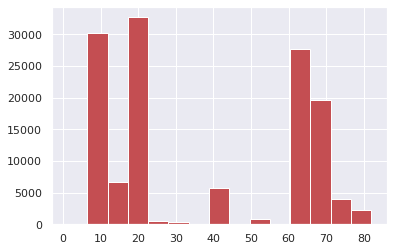

In [8]:
data.code.hist(color='r', bins=15)

In [9]:
df = data[['year', 'month', 'day', 'code']]
end_data = df[df['year'].between(1966, 2019)].copy()

In [10]:
end_data.head()

,year,month,day,code
0,1966,1,1,21
1,1966,1,1,70
2,1966,1,1,70
3,1966,1,1,70
4,1966,1,1,21


In [11]:
end_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130160 entries, 0 to 130159
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   year    130160 non-null  int64
 1   month   130160 non-null  int64
 2   day     130160 non-null  int64
 3   code    130160 non-null  int64
dtypes: int64(4)
memory usage: 5.0 MB


In [12]:
end_data.describe()

,year,month,day,code
count,130160.000000,130160.000000,130160.000000,130160.000000
mean,1993.742156,6.569461,15.771904,38.260349
std,14.560449,3.808099,8.768665,25.357593
min,1966.000000,1.000000,1.000000,1.000000
25%,1982.000000,3.000000,8.000000,12.000000
50%,1994.000000,7.000000,16.000000,21.000000
75%,2006.000000,10.000000,23.000000,64.000000
max,2019.000000,12.000000,31.000000,82.000000


In [13]:
# количество наблюдений (срочных) по рассматриваемым явлениям
for name in phenomen_names:
    print(end_data[end_data['code'] == phenomens.get(name)].code.value_counts())

22    2760
Name: code, dtype: int64
80    2212
Name: code, dtype: int64
43    1135
Name: code, dtype: int64
65    51
Name: code, dtype: int64
12    2434
Name: code, dtype: int64


## Цикл для всех явлений

Рассчитывает заданные характеристики, формирует таблицы и записывает в csv-файл

In [14]:
for name in phenomen_names:
    
    # выбираем данные, убираем повторы по дням
    df_prepare = end_data[end_data['code'] == phenomens.get(name)].copy()
    df_shift = df_prepare.loc[df_prepare['day'].shift() != df_prepare['day']]
    
    # количество явлений в каждый месяц кажого года
    quantity = df_shift.pivot_table(index='year', columns='month', 
                                   values='code', aggfunc='count',
                                   fill_value=0) # вместо Nan 0 - 
                                                # особенность методики
    
    # среднее количество дней с явлением
    df_mean = quantity.mean().round(2).to_frame().transpose()
    df_mean['year_value'] = round(quantity.sum(axis=1).mean(), 2)
    
    # максимальное количество дней с явлением
    df_max = quantity.max().round(2).to_frame().transpose()
    df_max['year_value'] = round(quantity.sum(axis=1).max(), 2)
        
    # повторяемость по месяцам (ср.кол. дней / кол. дней в месяце)
    index_month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 'year_value']
    
    df_month = pd.DataFrame({'month_days': [31, 28, 31, 
                                            30, 31, 30, 
                                            31, 31, 30, 
                                            31, 30, 31, 365]}
                            ,index = index_month)
    
    df_01 = df_mean.transpose() 
    df_02 = df_month
    df_prob = df_01.merge(df_02, how='inner', right_index=True, 
                          left_index=True)
    
    df_prob['prob'] = df_prob.iloc[:,0] / df_prob.iloc[:,1] * 100
    df_prob_res = df_prob.drop(columns=df_prob.columns[:2]).transpose()
    df_prob_res.columns = df_mean.columns
    
    # таблица со всеми расчетами
    list_of_result_tables = [df_mean, df_max, df_prob_res]
    df_result = pd.concat(list_of_result_tables)
    
    df_result.to_csv('results/result_{}.csv'.format(name), sep=';',
                     index=False)